# NVCL_KIT Scatter Plot Demonstration

*Acknowledgement: Borehole dataset courtesy of Mineral Resources Tasmania. (https://www.mrt.tas.gov.au/home)*

In [1]:
from nvcl_kit.reader import NVCLReader
from nvcl_kit.param_builder import param_builder
from nvcl_kit.constants import Scalar
from nvcl_kit.generators import gen_scalar_by_depth

**Build parameters**

In [2]:
param = param_builder('tas', max_boreholes=20)
if not param:
    print("Cannot build parameters for 'tas'")

**Initialise reader object**

In [3]:
reader = NVCLReader(param)
if not reader.wfs:
        print("ERROR!")


**Get the NVCL id of the 'MAC23' borehole**

In [4]:
my_nvclid_list = reader.filter_feat_list(nvcl_ids_only=True, name='MAC23')
print(my_nvclid_list)

['10026']


**Assemble data for the scatter plot**

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Initialise empty lists & sets to hold our x-values, y-values, colour and legend entries
x = []
y = []
colours = []
legend_set = set()

# NB: 'top_n' is set 5 to get top 5 minerals at each depth
for nvcl_id, log_id, scalar_list in gen_scalar_by_depth(reader, nvcl_id_list=my_nvclid_list, resolution=5.0, scalar_class=Scalar.Grp1_uTSAS, log_type='1', top_n=5):
    
    # Loop over all the depths
    for depth in scalar_list:
        
        # Loop over all the mineral measurements
        for meas in scalar_list[depth]:

            # Only print data for the first 20m
            if depth < 20:
                print(f"At {depth}m Class: {meas.className}   Count: {meas.classCount}   Name: {meas.classText}   RGBA Colour: {meas.colour}")

            # Gather Xs, Ys, colours and legend entries for the plot
            x.append(depth)
            y.append(meas.classCount)
            colours.append(meas.colour)
            legend_set.add((meas.colour, meas.classText))



At 2.5m Class: Grp1 uTSAS   Count: 232   Name: WHITE-MICA   RGBA Colour: (1.0, 1.0, 0.0, 1.0)
At 2.5m Class: Grp1 uTSAS   Count: 2   Name: KAOLIN   RGBA Colour: (1.0, 0.0, 0.0, 1.0)
At 7.5m Class: Grp1 uTSAS   Count: 472   Name: WHITE-MICA   RGBA Colour: (1.0, 1.0, 0.0, 1.0)
At 12.5m Class: Grp1 uTSAS   Count: 444   Name: WHITE-MICA   RGBA Colour: (1.0, 1.0, 0.0, 1.0)
At 17.5m Class: Grp1 uTSAS   Count: 498   Name: WHITE-MICA   RGBA Colour: (1.0, 1.0, 0.0, 1.0)
At 17.5m Class: Grp1 uTSAS   Count: 60   Name: KAOLIN   RGBA Colour: (1.0, 0.0, 0.0, 1.0)




**Display the scatter plot**

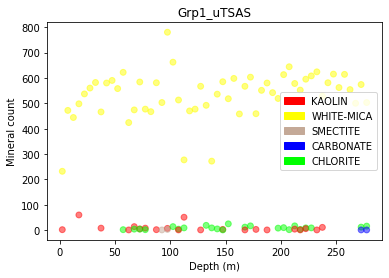

In [6]:
# Create entries for the legend
legend_list = [mpatches.Patch(color=colour, label=mineral_name) for colour, mineral_name in list(legend_set)]

# Create graph
plt.title('Grp1_uTSAS')
plt.legend(handles=legend_list)
plt.ylabel('Mineral count')
plt.xlabel('Depth (m)')
plt.scatter(x, y, s=35, c=colours, alpha=0.5)
plt.show()